# <span style="color:blue">**Capítulo 11**</span>
## <font color=blue size=8> Modelo de Mezcla Gaussiana </font>
### Un modelo de agrupamiento probabilístico para conjuntos de datos con mezcla de manchas gaussianas

## En Resumen 

Existen situaciones típicas donde sabes que un conjunto de datos probablemente contendrá clusters, cada uno con una distribución Gaussiana. Considera, por ejemplo, la población de Estados Unidos. La distribución de afroamericanos, asiáticos o nativos hawaianos se observa en ciertos sectores.  

Asumiendo que cada distribución tiene una forma elíptica en lugar de circular, como se identifica en el clustering K-means, la mezcla Gaussiana sería un mejor enfoque para identificar estos clusters. El clustering K-means es un algoritmo basado en distancia que intenta agrupar los puntos más cercanos, creando una forma circular para el cluster. El modelo de mezcla Gaussiana es un algoritmo basado en distribución donde consideramos tanto la media ($\mu$) como la varianza ($\sigma$) en la distribución.  
Para entender el algoritmo, primero veamos qué es la distribución Gaussiana.

## Distribución Gaussiana  

Puedes experimentar con distribuciones usando la librería *Matplotlib*.

La figura 11.1 muestra las distribuciones Gaussianas para varios valores de $\mu$ y $\sigma$. El algoritmo trabaja con estos dos parámetros para agrupar los puntos. Dependiendo de los valores de estos parámetros, la forma del cluster variará.  

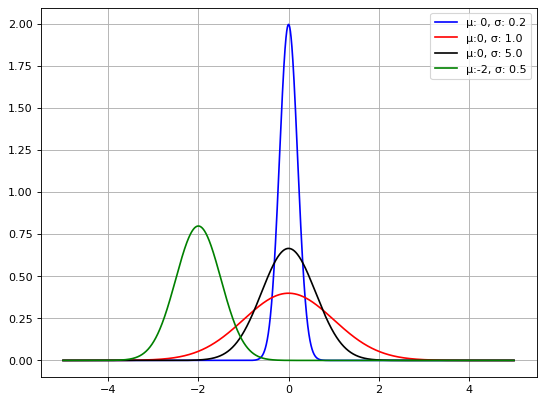

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#eje x varía de -5 a 5 con pasos de 0,001
x = np.arange(-5, 5, 0.001)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.grid()
#definir múltiples distribuciones normales
plt.plot(x, norm.pdf(x, 0, 0.2), label='μ: 0, σ: 0.2', color = "blue")
plt.plot(x, norm.pdf(x, 0, 1), label='μ:0, σ: 1.0', color = "red")
plt.plot(x, norm.pdf(x, 0, 0.6), label='μ:0, σ: 5.0', color = "black")
plt.plot(x, norm.pdf(x, -2, 0.5), label='μ:-2, σ: 0.5', color = "green")

#añadir leyenda a la trama
plt.legend()

## Distribución de Probabilidad  

La función de distribución de probabilidad se expresa como:  

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$  

donde $\mu$ es la media y $\sigma^2$ representa la varianza. Esta es una función de distribución para un espacio unidimensional y es válida para una sola variable. Para un espacio bidimensional, tendremos una curva de campana tridimensional.  

Para una distribución Gaussiana multivariante, expresamos la función de densidad de probabilidad como:  

$$
G(X \mid \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^j \, |\Sigma|}} \exp \left( -\frac{1}{2} (X - \mu)^T \Sigma^{-1} (X - \mu) \right)
$$  

donde $X$ representa el vector de entrada, $\mu$ es el vector media n-dimensional, y $\Sigma$ es la matriz de covarianza $n \times n$. Determinamos los valores de $\mu$ y $\Sigma$ usando una técnica estadística llamada *expectativa-maximización* (*EM*).  

<div>
  <img src="content/fig11.2.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.2</p>

<p>Distribuciones gaussianas para varios tipos de covarianza.</p>

## Selección del Número de Clusters  

Has visto que en el clustering K-means usamos el *silhouette score* o la inercia para obtener una estimación del número de clusters. Sin embargo, con *GMM*, la forma del cluster puede no ser esférica. Por lo tanto, usamos el criterio de información Bayesiano (*BIC*) o el criterio de información de Akaike (*AIC*) para elegir el mejor número de clusters para *GMM*.  

Primero mostraré la implementación de *GMM* tal como la proporciona *sklearn*, junto con un proyecto trivial para experimentación. Luego, presentaré un programa para estimar el número de clusters usando *BIC* y *AIC*.

## Implementación  

La librería *sklearn* proporciona la implementación del algoritmo *GMM* en la clase `GaussianMixture`. Debes suministrar el número de clusters como un parámetro.  

```python
gmm = GaussianMixture(n_components=3)
gmm.fit(d)

Después de ajustar el modelo, puedes descubrir los clusters llamando a su método `predict`.

```python
labels = gmm.predict(d)

## Proyecto

El proyecto aplica el algoritmo *GMM* en dos conjuntos de datos: el famoso conjunto de datos *iris* y un conjunto de datos aleatorio creado mediante código. El conjunto de datos *iris* se proporciona en la propia librería *sklearn*. Lo cargas en el proyecto usando la siguiente instrucción:

In [224]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns

In [225]:
iris = datasets.load_iris()

Por si no recuerdas qué contiene, puedes imprimir los nombres de las características y del objetivo. La salida se muestra en la figura 11.3.  

In [226]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [227]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.3</p>

<p>Características y objetivo de la base de datos del iris.</p>

Extrae la longitud y el ancho del sépalo como características para nuestra experimentación. 

In [228]:
X = iris.data[:, :2]
d = pd.DataFrame(X)

Aplicamos el algoritmo *GMM* en este conjunto de datos:  

In [229]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)

GaussianMixture(n_components=3)

Ahora, realiza las predicciones sobre el conjunto de datos original para averiguar la asignación de cluster de cada punto de datos.  La figura 11.4 muestra las predicciones hechas por el modelo.  

In [230]:
labels = gmm.predict(d)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.4</p>

<p>Predicciones del Modelo.</p>

Como puedes ver, cada punto de datos ahora está asociado con algún cluster—0, 1 o 2. Ahora puedes visualizar el clustering usando una rutina de gráfico simple. La figura 11.5 muestra tanto el conjunto de datos original como el agrupado.  

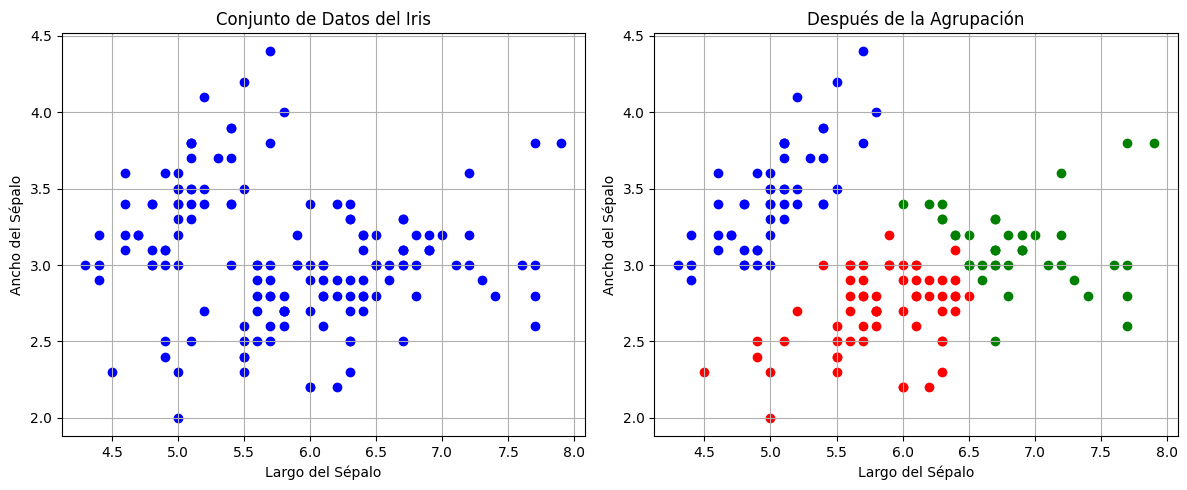

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer gráfico: Conjunto de Datos del Iris
axes[0].scatter(d[0], d[1], c='blue')
axes[0].set_xlabel('Largo del Sépalo')
axes[0].set_ylabel('Ancho del Sépalo')
axes[0].set_title('Conjunto de Datos del Iris')
axes[0].grid(True)

# Segundo gráfico: Después de la Agrupación
d['labels'] = labels
d0 = d[d['labels'] == 0]
d1 = d[d['labels'] == 1]
d2 = d[d['labels'] == 2]

axes[1].scatter(d0[0], d0[1], c='green')
axes[1].scatter(d1[0], d1[1], c='blue')
axes[1].scatter(d2[0], d2[1], c='red')
axes[1].set_xlabel('Largo del Sépalo')
axes[1].set_ylabel('Ancho del Sépalo')
axes[1].set_title('Después de la Agrupación')
axes[1].grid(True)

plt.tight_layout()
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.5</p>

<p>Conjunto de datos original y clústeres formados.</p>

A partir de la salida anterior, puedes entender la dependencia de cada clase de plantas con respecto a su ancho y longitud. 

In [232]:
# probabilidad logarítmica convergente 
print(gmm.lower_bound_)

-1.4985672470486966


In [233]:
# número de iteraciones necesarias para converger
print(gmm.n_iter_)

8


Realicé experimentos adicionales en un conjunto de datos de 500 puntos distribuidos en tres clusters. Creamos el conjunto de datos usando la siguiente instrucción: 

In [234]:
dataset, clusters = make_blobs(n_samples = 500, n_features = 3, cluster_std = 0.9, random_state = 0)

El código para aplicar *GMM* y visualizar los conjuntos de datos de clusters permanece igual que el anterior.

In [235]:
gmm = GaussianMixture(n_components=3)
gmm.fit(dataset)

GaussianMixture(n_components=3)

In [236]:
labels = gmm.predict(dataset)
frame = pd.DataFrame(dataset)

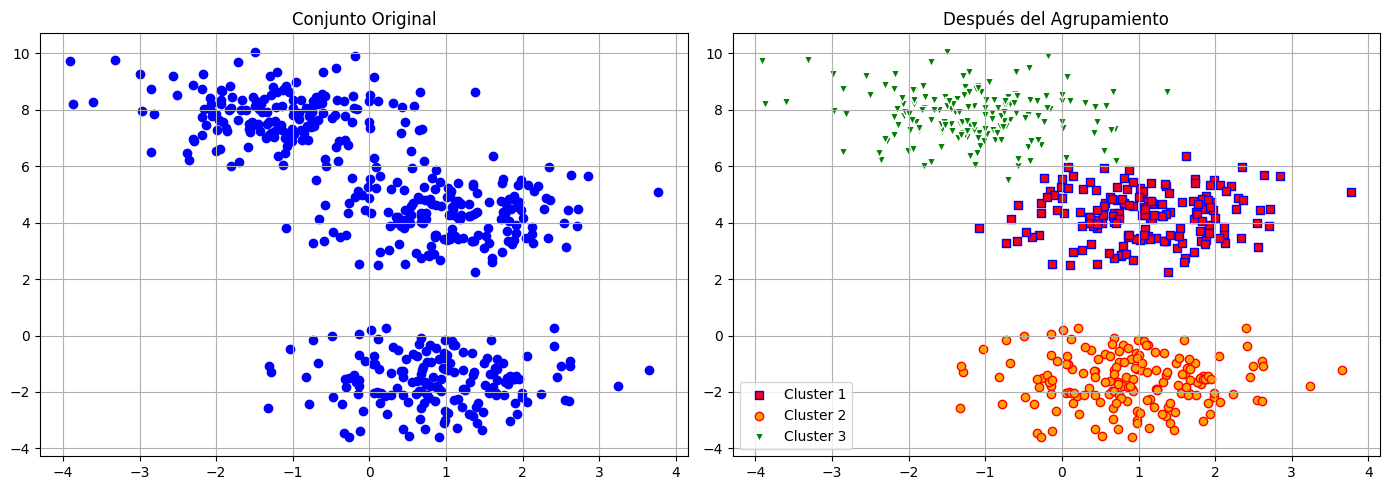

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(dataset[:, 0], dataset[:, 1], c='blue')
axes[0].set_title('Conjunto Original')
axes[0].grid(True)

axes[1].scatter(dataset[clusters == 0, 0], dataset[clusters == 0, 1], c='red', marker='s', edgecolors='b', label='Cluster 1')
axes[1].scatter(dataset[clusters == 1, 0], dataset[clusters == 1, 1], c='orange', marker='o', edgecolors='r', label='Cluster 2')
axes[1].scatter(dataset[clusters == 2, 0], dataset[clusters == 2, 1], c='green', marker='v', edgecolors='w', label='Cluster 3')
axes[1].set_title('Después del Agrupamiento')
axes[1].legend(loc='lower left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.16</p>

<p>Conjunto de datos aleatorio antes y después de clustering.</p>

## Determinando el Número Óptimo de Clusters 


En el algoritmo K-means, usamos el *silhouette score* o la inercia para determinar el número óptimo de clusters. De manera similar, en *GMM*, se usan *BIC* o *AIC* para estimar el número de clusters. Estas son técnicas de selección de modelos probabilísticos que se utilizan para puntuar diferentes modelos. La implementación de *GMM* proporciona dos métodos, `aic` y `bic`, para obtener el criterio de información de Akaike y Bayesiano, respectivamente, para el modelo actual. Usas esta información para un conjunto de valores de $K$ y luego seleccionas el mejor modelo para el clustering final.

Primero veamos el criterio de información Bayesiano (*BIC*). El algoritmo *GMM* soporta cuatro tipos diferentes de covarianza: *full*, *tied*, *diag* y *spherical*. Esto se ingresa como uno de los parámetros en la instanciación de la clase.

``` python
gmm = GaussianMixture(n_components =k, covariance_type=’diag’)

In [238]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns
import numpy as np

In [239]:
X, Y = make_blobs(n_samples = 1000, n_features = 3, cluster_std = 0.9, random_state = 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_26112\2633177174.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');


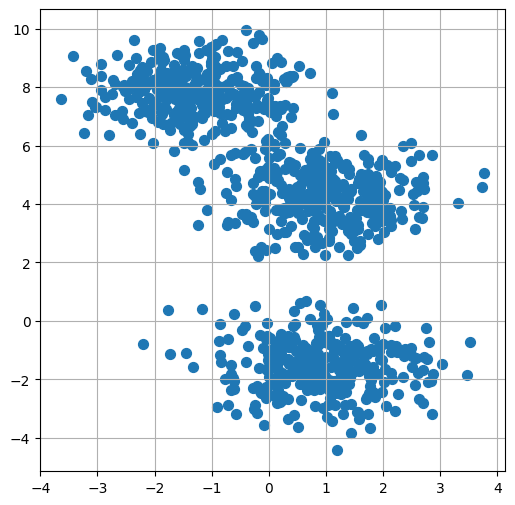

In [240]:
plt.rcParams["figure.figsize"] = (6,6)   
plt.grid()
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');

Ajustaremos *GMM* en nuestros conjuntos de datos con estos cuatro tipos de covarianza y extraeremos la información de *BIC* para diferentes tamaños de clusters ($K$). 

In [241]:
bic_array = []

K=[2,3,4,5]
cv_types = ['spherical', 'tied', 'diag', 'full']
for cov_type in cv_types:
    for k in K:
        gmm = GaussianMixture(n_components =k, covariance_type=cov_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_array.append(bic)

In [242]:
# extracción de datos
width = 0.2
mk = np.array(K)
x = np.array(bic_array)
spherical_data = x[0:4]
tied_data = x[4:8]
diag_data = x[8:12]
full_data = x[12:16]

Después de extraer la información de *BIC*, la graficaremos para diferentes valores de $K$ y covarianza. La figura 11.7 muestra la salida para nuestro conjunto de datos.  

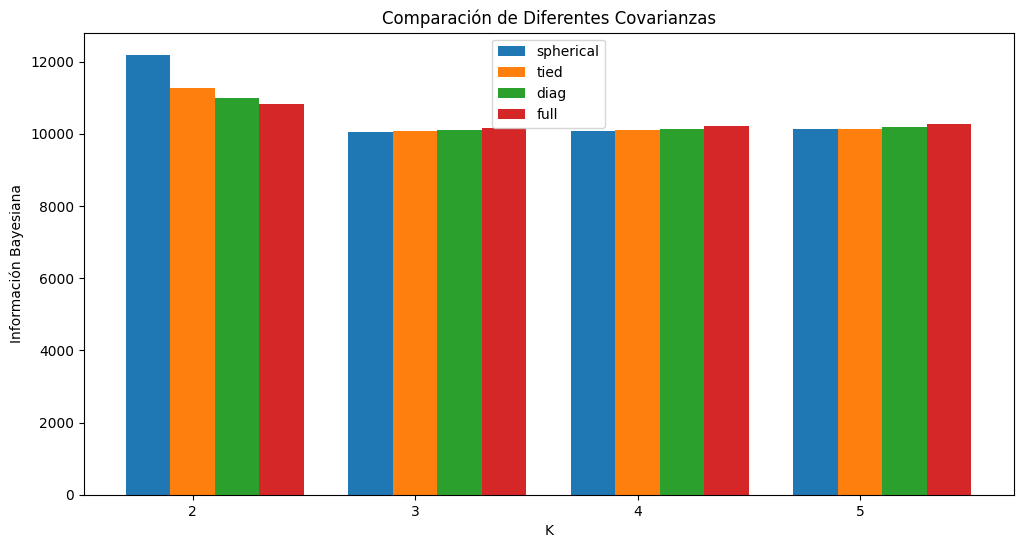

In [243]:
plt.figure(figsize=(12,6))
plt.bar(mk-width, spherical_data, width, label='spherical')
plt.bar(mk, tied_data, width, label='tied')
plt.bar(mk+width, diag_data, width, label='diag')
plt.bar(mk+width*2, full_data, width, label='full')
plt.xticks(mk)
plt.xlabel("K")
plt.ylabel("Información Bayesiana")
plt.title ("Comparación de Diferentes Covarianzas")
plt.legend()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.7</p>

<p>Gráficas de BIC.</p>

La altura de las barras para $K = 3$ es la más baja entre los cinco grupos, mostrando que el valor óptimo de $K$ es 3. La covarianza para este conjunto de datos no tiene mucho sentido.  

Ahora graficaremos los valores de *AIC* y *BIC* para diferentes $K$. Calculamos el total de *AIC* y *BIC* usando el siguiente fragmento de código:  

In [244]:
bic_array = []
aic_array = []

for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    bic_array.append(gmm.bic(X))
    aic_array.append(gmm.aic(X))

La gráfica de *AIC/BIC* para diferentes valores de $K$ se muestra en la figura 11.8.  

Text(0.5, 1.0, 'AIC/BIC contra  K')

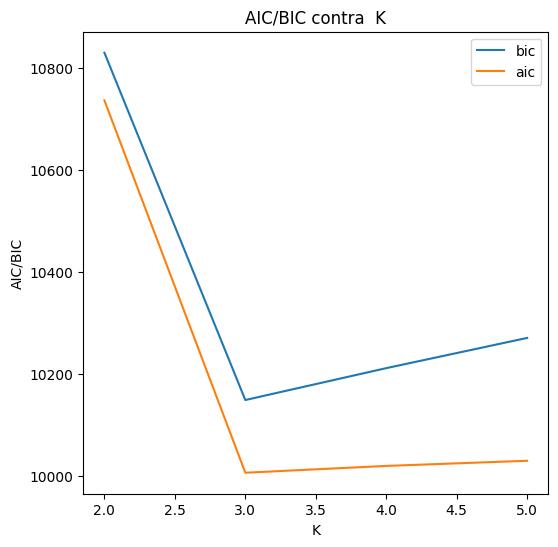

In [245]:
plt.figure()
plt.plot(K, bic_array, label='bic')
plt.plot(K, aic_array, label='aic')
plt.legend()
plt.xlabel('K')
plt.ylabel('AIC/BIC')
plt.title ("AIC/BIC contra  K")


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.8</p>

<p>Gráficos AIC/BIC para diferentes valores K.</p>


El *codo* en el gráfico anterior muestra un valor óptimo para $K$, que en nuestro caso es 3.

Realicé un experimento similar en un conjunto de datos de 4 grupos (*blobs*). Los resultados se muestran en la figura 11.9.  


In [246]:
X, Y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0, cluster_std = 0.2)

In [247]:
# para bic
bic_array = []

K=[2,3,4,5]
cv_types = ['spherical', 'tied', 'diag', 'full']
for cov_type in cv_types:
    for k in K:
        gmm = GaussianMixture(n_components =k, covariance_type=cov_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_array.append(bic)

In [248]:
# para aic/bic
bic_array = []
aic_array = []

for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    bic_array.append(gmm.bic(X))
    aic_array.append(gmm.aic(X))

La gráfica de *AIC/BIC* muestra claramente que el valor óptimo de $K$ es 4. Las gráficas de *BIC* para diferentes tipos de covarianza no nos dan suficiente información útil debido a la naturaleza del conjunto de datos.  

C:\Users\HP\AppData\Local\Temp\ipykernel_26112\2863741404.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', c='blue')


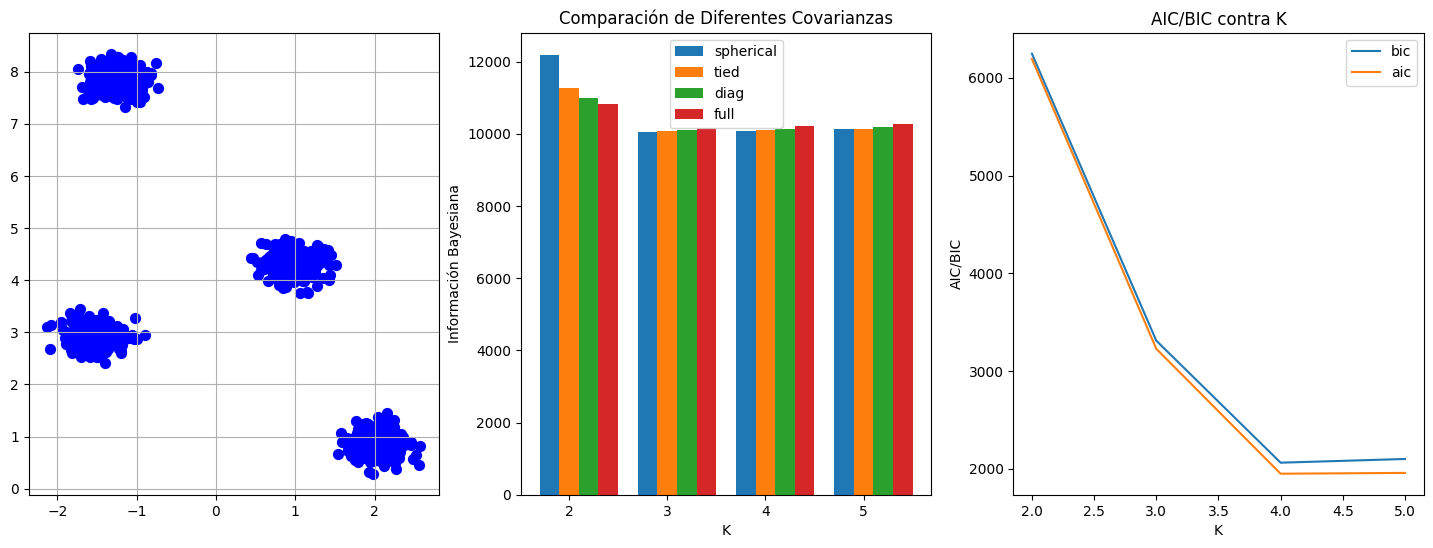

In [249]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', c='blue')
axes[0].grid()

axes[1].bar(mk-width, spherical_data, width, label='spherical')
axes[1].bar(mk, tied_data, width, label='tied')
axes[1].bar(mk+width, diag_data, width, label='diag')
axes[1].bar(mk+width*2, full_data, width, label='full')
axes[1].set_xticks(mk)
axes[1].set_xlabel("K")
axes[1].set_ylabel("Información Bayesiana")
axes[1].set_title("Comparación de Diferentes Covarianzas")
axes[1].legend()

axes[2].plot(K, bic_array, label='bic')
axes[2].plot(K, aic_array, label='aic')
axes[2].legend()
axes[2].set_xlabel('K')
axes[2].set_ylabel('AIC/BIC')
axes[2].set_title("AIC/BIC contra K")

plt.show()     


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.9</p>

<p>Gráficos AIC/BIC para un conjunto de datos de cuatro grupos.</p>

La figura 11.10 presenta gráficas similares para un conjunto de datos de 5 grupos (*blobs*).

In [250]:
X, Y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0, cluster_std = 0.2)     

In [251]:
# para bic
bic_array = []

K=[2,3,4,5,6,7,8]
cv_types = ['spherical', 'tied', 'diag', 'full']
for cov_type in cv_types:
    for k in K:
        gmm = GaussianMixture(n_components =k, covariance_type=cov_type)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_array.append(bic)

width = 0.2
mk = np.array(K)
x = np.array(bic_array)
spherical_data = x[0:7] #7
tied_data = x[7:14] #7 14
diag_data = x[14:21] #14 21
full_data = x[21:28] #21 28

In [252]:
# para aic/aic

bic_array = []
aic_array = []

for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    bic_array.append(gmm.bic(X))
    aic_array.append(gmm.aic(X))

C:\Users\HP\AppData\Local\Temp\ipykernel_26112\679362910.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', c='blue')


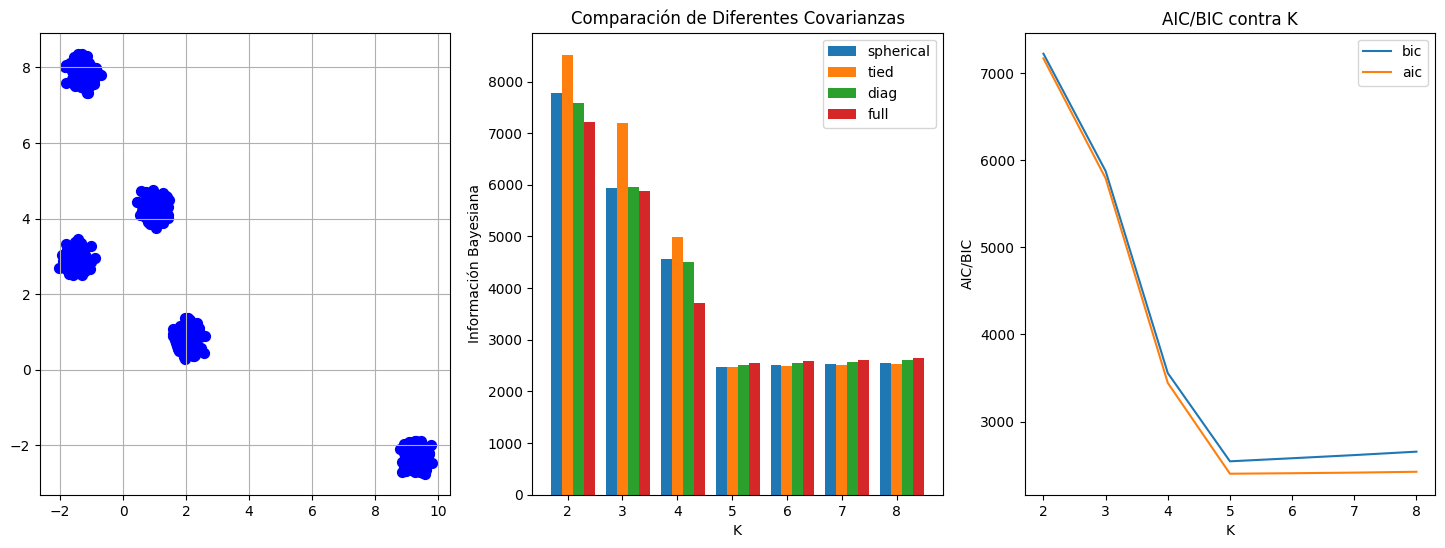

In [253]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', c='blue')
axes[0].grid()

axes[1].bar(mk-width, spherical_data, width, label='spherical')
axes[1].bar(mk, tied_data, width, label='tied')
axes[1].bar(mk+width, diag_data, width, label='diag')
axes[1].bar(mk+width*2, full_data, width, label='full')
axes[1].set_xticks(mk)
axes[1].set_xlabel("K")
axes[1].set_ylabel("Información Bayesiana")
axes[1].set_title("Comparación de Diferentes Covarianzas")
axes[1].legend()

axes[2].plot(K, bic_array, label='bic')
axes[2].plot(K, aic_array, label='aic')
axes[2].legend()
axes[2].set_xlabel('K')
axes[2].set_ylabel('AIC/BIC')
axes[2].set_title("AIC/BIC contra K")

plt.show()     

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.10</p>

<p>Gráficos AIC/BIC para un conjunto de datos de cinco grupos.</p>

Como antes, la gráfica de *AIC/BIC* muestra claramente que el valor óptimo de $K$ es 5. La gráfica de *BIC* ahora da suficiente variación en la altura de las barras para concluir que el $K$ óptimo es 5, ya que observamos que las barras de *BIC* para todos los tipos de varianza tienen la altura más baja entre el conjunto de las siete observaciones.  

Realicé un experimento adicional en el conjunto de datos *iris*. Los resultados se presentan en la figura 11.11.

In [254]:
iris = sns.load_dataset("iris")

In [255]:
copy_iris = iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [256]:
# para bic
bic_array = []
K=[2,3,4,5]
cv_types = ['spherical', 'tied', 'diag', 'full']
for cov_type in cv_types:
    for k in K:
        gmm = GaussianMixture(n_components =k, covariance_type=cov_type)
        gmm.fit(copy_iris)
        bic = gmm.bic(copy_iris)
        bic_array.append(bic)

width = 0.2
mk = np.array(K)
x = np.array(bic_array)
spherical_data = x[0:4]
tied_data = x[4:8]
diag_data = x[8:12]
full_data = x[12:16]

In [257]:
# para aic/bic
bic_array = []
aic_array = []

for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(copy_iris)
    bic_array.append(gmm.bic(copy_iris))
    aic_array.append(gmm.aic(copy_iris))

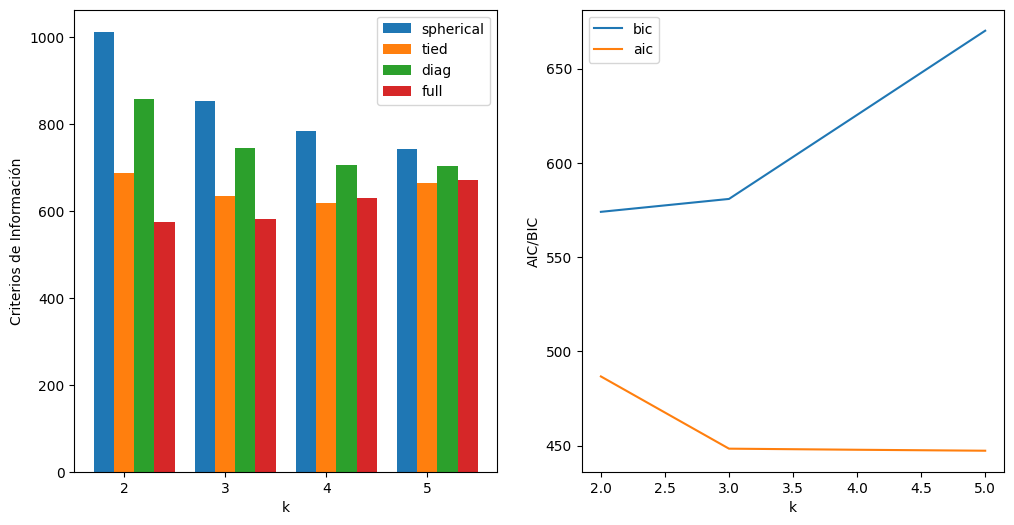

In [258]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(mk-0.2, spherical_data, width, label='spherical')
axes[0].bar(mk, tied_data, width, label='tied')
axes[0].bar(mk+0.2, diag_data, width, label='diag')
axes[0].bar(mk+0.4, full_data, width, label='full')
axes[0].set_xticks(mk)
axes[0].set_xlabel("k")
axes[0].set_ylabel("Criterios de Información")
axes[0].legend()

axes[1].plot(K, bic_array, label='bic')
axes[1].plot(K, aic_array, label='aic')
axes[1].legend()
axes[1].set_xlabel('k')
axes[1].set_ylabel('AIC/BIC')

plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 11.11</p>

<p>Gráficos AIC/BIC para el conjunto de datos de iris.</p>

Finalmente, lo probé en el conjunto de datos *lunas* creado usando la función *make_moons* como sigue. 

In [259]:
x2, y2 = make_moons(n_samples=400, noise=0.05, random_state=202)

In [260]:
# para bic
bic_array_moons = []

K=[2,3,4,5]
cv_types = ['spherical', 'tied', 'diag', 'full']
for cov_type in cv_types:
    for k in K:
        gmm = GaussianMixture(n_components=k, covariance_type=cov_type)
        gmm.fit(x2)
        bic = gmm.bic(x2)
        bic_array_moons.append(bic)

width = 0.2
mk = np.array(K)
x = np.array(bic_array_moons)
spherical_data = x[0:4]
tied_data = x[4:8]
diag_data = x[8:12]
full_data = x[12:16]

In [261]:
#para aic/bic
bic_array_moons = []
aic_array_moons = []

for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(x2)
    bic_array_moons.append(gmm.bic(x2))
    aic_array_moons.append(gmm.aic(x2))

Los resultados se presentan en la figura 11.12.  

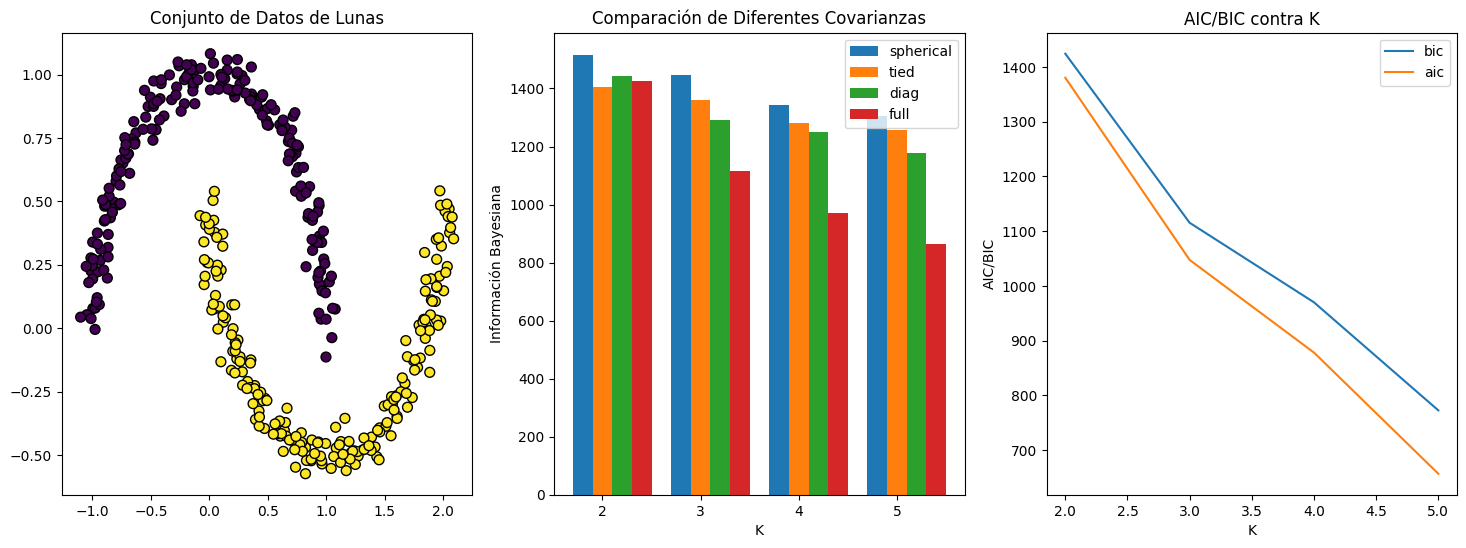

In [262]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(x2[:, 0], x2[:, 1], marker='o', c=y2, s=50, edgecolor='k')
axes[0].set_title("Conjunto de Datos de Lunas")

axes[1].bar(mk-width, spherical_data, width, label='spherical')
axes[1].bar(mk, tied_data, width, label='tied')
axes[1].bar(mk+width, diag_data, width, label='diag')
axes[1].bar(mk+width*2, full_data, width, label='full')
axes[1].set_xticks(mk)
axes[1].set_xlabel("K")
axes[1].set_ylabel("Información Bayesiana")
axes[1].set_title("Comparación de Diferentes Covarianzas")
axes[1].legend()

axes[2].plot(K, bic_array_moons, label='bic')
axes[2].plot(K, aic_array_moons, label='aic')
axes[2].legend()
axes[2].set_xlabel('K')
axes[2].set_ylabel('AIC/BIC')
axes[2].set_title("AIC/BIC contra K")

plt.show()

Se puede observar que, con los conjuntos de datos *iris* y *lunas*, los resultados no son muy interpretables para obtener el valor óptimo de $K$. Por lo tanto, es importante entender que esta técnica de determinación del $K$ óptimo no funcionará para cualquier tipo de conjunto de datos. Así, un conocimiento previo de la distribución de los datos mediante algún otro medio es esencial antes de aplicar esta técnica.

## Resumen  

El algoritmo del modelo de mezcla Gaussiana asume que la distribución de tus datos está compuesta por clusters de distribuciones Gaussianas. Para estimar el número de clusters antes de realizar el clustering completo, usamos gráficos de *AIC/BIC*. Los gráficos no pueden proporcionarnos información útil si la distribución no es realmente una mezcla de clusters Gaussianos.